In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baseline Work

In [4]:
# Import the supply chain data

supply_chain = pd.read_csv('data/supply_chain.csv', delimiter=',', parse_dates=[5])
supply_chain.head()

,gvkey,conm,cgvkey,cconm,cnms,srcdate,cid,sid,ctype,salecs,scusip,stic,ccusip,ctic
0,1013,ADC TELECOMMUNICATIONS INC,2136,VERIZON COMMUNICATIONS INC,VERIZON COMMUNICATIONS,2002-10-31,10,0,COMPANY,111.056,000886309,ADCT.1,92343V104,VZ
1,1013,ADC TELECOMMUNICATIONS INC,2136,VERIZON COMMUNICATIONS INC,VERIZON COMMUNICATIONS,2004-10-31,13,0,COMPANY,104.312,000886309,ADCT.1,92343V104,VZ
2,1013,ADC TELECOMMUNICATIONS INC,2136,VERIZON COMMUNICATIONS INC,VERIZON COMMUNICATIONS,2005-10-31,13,0,COMPANY,146.000,000886309,ADCT.1,92343V104,VZ
3,1013,ADC TELECOMMUNICATIONS INC,2136,VERIZON COMMUNICATIONS INC,VERIZON COMMUNICATIONS,2006-10-31,13,0,COMPANY,205.000,000886309,ADCT.1,92343V104,VZ
4,1013,ADC TELECOMMUNICATIONS INC,2136,VERIZON COMMUNICATIONS INC,VERIZON COMMUNICATIONS,2007-10-31,13,0,COMPANY,236.000,000886309,ADCT.1,92343V104,VZ


In [5]:
supply_chain.shape

(71206, 14)

In [6]:
# Create the S&P universe
# Get the universe from the S&P file
sp_universe = pd.read_csv('data/sp500.csv', parse_dates=[1]).iloc[:,1:]

/var/folders/mq/q4v4ywv11f7091c_j49p3vf40000gn/T/ipykernel_60690/2980387061.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_universe = pd.read_csv('data/sp500.csv', parse_dates=[1]).iloc[:,1:]


In [7]:
sp_universe.head()

,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret
0,2011-01-31,60986.0,NEWELL RUBBERMAID INC,65122910,11.0,1.0,3089.0,NWL,7875,01,1989-04-27,2022-03-31,0.058856
1,2011-01-31,85914.0,BEST BUY COMPANY INC,08651610,11.0,1.0,5731.0,BBY,2184,01,1999-06-30,2022-03-31,-0.008457
2,2011-01-31,80711.0,APARTMENT INVESTMENT & MGMT CO,03748R10,18.0,1.0,6798.0,AIV,30490,01,2003-03-14,2020-12-18,-0.010836
3,2011-01-31,59176.0,AMERICAN EXPRESS CO,02581610,11.0,1.0,6141.0,AXP,1447,01,1976-07-01,2022-03-31,0.014912
4,2011-01-31,75100.0,TIFFANY & CO NEW,88654710,11.0,1.0,5944.0,TIF,13646,01,2000-06-21,2021-01-06,-0.066485


In [8]:
sp_universe['date'].unique()

array(['2011-01-31T00:00:00.000000000', '2011-02-28T00:00:00.000000000',
       '2011-03-31T00:00:00.000000000', '2011-04-29T00:00:00.000000000',
       '2011-05-31T00:00:00.000000000', '2011-06-30T00:00:00.000000000',
       '2011-07-29T00:00:00.000000000', '2011-08-31T00:00:00.000000000',
       '2011-09-30T00:00:00.000000000', '2011-10-31T00:00:00.000000000',
       '2011-11-30T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-01-31T00:00:00.000000000', '2012-02-29T00:00:00.000000000',
       '2012-03-30T00:00:00.000000000', '2012-04-30T00:00:00.000000000',
       '2012-05-31T00:00:00.000000000', '2012-06-29T00:00:00.000000000',
       '2012-07-31T00:00:00.000000000', '2012-08-31T00:00:00.000000000',
       '2012-09-28T00:00:00.000000000', '2012-10-31T00:00:00.000000000',
       '2012-11-30T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-01-31T00:00:00.000000000', '2013-02-28T00:00:00.000000000',
       '2013-03-28T00:00:00.000000000', '2013-04-30

In [9]:
def get_num_suppliers(company_ticker, dt):
    # get the number of suppliers for a client as of the date in question
    df_supply = supply_chain[(supply_chain['ctic'] == company_ticker) & (supply_chain['srcdate']<= dt)]
    return len(df_supply['stic'].unique())

In [10]:
sp_universe['supplier_cnt'] = sp_universe.apply(lambda x: get_num_suppliers(x['ticker'], x['date']), axis=1)

In [11]:
sp_universe[:10]

,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret,supplier_cnt
0,2011-01-31,60986.0,NEWELL RUBBERMAID INC,65122910,11.0,1.0,3089.0,NWL,7875,01,1989-04-27,2022-03-31,0.058856,0
1,2011-01-31,85914.0,BEST BUY COMPANY INC,08651610,11.0,1.0,5731.0,BBY,2184,01,1999-06-30,2022-03-31,-0.008457,49
2,2011-01-31,80711.0,APARTMENT INVESTMENT & MGMT CO,03748R10,18.0,1.0,6798.0,AIV,30490,01,2003-03-14,2020-12-18,-0.010836,0
3,2011-01-31,59176.0,AMERICAN EXPRESS CO,02581610,11.0,1.0,6141.0,AXP,1447,01,1976-07-01,2022-03-31,0.014912,16
4,2011-01-31,75100.0,TIFFANY & CO NEW,88654710,11.0,1.0,5944.0,TIF,13646,01,2000-06-21,2021-01-06,-0.066485,2
5,2011-01-31,76708.0,DEVRY INC DEL,25189310,11.0,1.0,8221.0,DV,3905,01,2009-06-09,2012-09-28,0.086078,0
6,2011-01-31,83976.0,ABERCROMBIE & FITCH CO,00289620,11.0,1.0,5651.0,ANF,63643,01,2007-03-29,2013-12-20,-0.125282,6
7,2011-01-31,45241.0,FOREST LABS INC,34583810,11.0,1.0,2834.0,FRX,4843,01,2000-11-22,2014-06-30,0.008755,0
8,2011-01-31,12067.0,NOVELLUS SYSTEMS INC,67000810,11.0,3.0,3350.0,NVLS,14623,01,2000-06-19,2012-06-04,0.116027,0
9,2011-01-31,59408.0,BANK OF AMERICA CORP,06050510,11.0,1.0,6021.0,BAC,7647,01,1976-07-01,2022-03-31,0.029235,27


In [12]:
supply_chain[(supply_chain['ctic'] == 'BBY')&(supply_chain['srcdate']<='2011-01-31')]

,gvkey,conm,cgvkey,cconm,cnms,srcdate,cid,sid,ctype,salecs,scusip,stic,ccusip,ctic
3486,4128,COBRA ELECTRONICS CORP,2184,BEST BUY CO INC,BEST BUY INC,2001-12-31,2,4,COMPANY,15.566,191042100,COBR,086516101,BBY
3487,4128,COBRA ELECTRONICS CORP,2184,BEST BUY CO INC,BEST BUY INC,2002-12-31,2,4,COMPANY,19.425,191042100,COBR,086516101,BBY
3490,4128,COBRA ELECTRONICS CORP,2184,BEST BUY CO INC,BEST BUY INC,2003-12-31,2,4,COMPANY,14.925,191042100,COBR,086516101,BBY
3491,4128,COBRA ELECTRONICS CORP,2184,BEST BUY CO INC,Best Buy Inc,2004-12-31,2,4,COMPANY,17.449,191042100,COBR,086516101,BBY
6162,6313,K-TEL INTERNATIONAL,2184,BEST BUY CO INC,Best Buy Co Inc,2000-06-30,5,0,COMPANY,NaN,482724309,KTLI,086516101,BBY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61732,164758,DEI HOLDINGS INC,2184,BEST BUY CO INC,BEST BUY CO INC,2007-12-31,9,1,COMPANY,83.263,23319E206,DEIX,086516101,BBY
67292,184449,EXCEL TRUST INC,2184,BEST BUY CO INC,Best Buy Co. Inc.,2009-12-31,40,2,COMPANY,NaN,30068C109,EXL,086516101,BBY
70386,266315,KITE REALTY GROUP TRUST,2184,BEST BUY CO INC,Best Buy Co. Inc.,2008-12-31,16,1,COMPANY,0.934,49803T300,KRG,086516101,BBY
70403,266315,KITE REALTY GROUP TRUST,2184,BEST BUY CO INC,Best Buy Co. Inc.,2009-12-31,16,1,COMPANY,0.934,49803T300,KRG,086516101,BBY


In [13]:
# Get the return data
return_data = pd.read_csv('data/CRSP_daily.csv', delimiter=',', parse_dates=[1])
return_data.head()

/var/folders/mq/q4v4ywv11f7091c_j49p3vf40000gn/T/ipykernel_60690/2882647890.py:2: DtypeWarning: Columns (6,11,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  return_data = pd.read_csv('data/CRSP_daily.csv', delimiter=',', parse_dates=[1])


,PERMNO,date,SHRCD,EXCHCD,TICKER,COMNAM,SHRCLS,PRIMEXCH,TRDSTAT,SECSTAT,...,ASK,SHROUT,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10104,2009-01-02,11,3,ORCL,ORACLE CORP,NaN,Q,A,R,...,18.39,5046177.0,17.64,83748.0,0.038353,0.030512,0.030311,0.038274,0.038221,0.031608
1,10104,2009-01-05,11,3,ORCL,ORACLE CORP,NaN,Q,A,R,...,18.09,5046177.0,18.19,96278.0,-0.017382,-0.000600,-0.000623,0.016764,0.016737,-0.004668
2,10104,2009-01-06,11,3,ORCL,ORACLE CORP,NaN,Q,A,R,...,18.39,5046177.0,18.17,105581.0,0.016584,0.011305,0.011295,0.033647,0.033620,0.007817
3,10104,2009-01-07,11,3,ORCL,ORACLE CORP,NaN,Q,A,R,...,17.65,5046177.0,18.06,116318.0,-0.040239,-0.030516,-0.030889,-0.022271,-0.022326,-0.030010
4,10104,2009-01-08,11,3,ORCL,ORACLE CORP,NaN,Q,A,R,...,17.62,5046177.0,17.50,112164.0,-0.0017,0.006281,0.006247,0.011896,0.011791,0.003397


In [14]:
return_data = return_data[return_data['RET'] != 'C']#['excess_ret']#.astype(float)
return_data['RET'] = return_data['RET'].astype(float)

In [15]:
return_data['excess_ret'] = return_data['RET'] - return_data['sprtrn']

In [16]:
return_data = return_data.rename(columns={'TICKER': 'ticker', 'DATE': 'date'})[['ticker', 'date', 'excess_ret']]

Get the monthly returns

In [17]:
return_data['month_end'] = return_data['date'] + pd.offsets.MonthEnd(0)

In [18]:
def convert_daily_to_month_ret(daily_rets):
    daily_rets['temp1'] = np.log(1 + daily_rets['excess_ret'])
    return np.exp(daily_rets['temp1'].sum()) - 1

In [19]:
return_data = return_data.groupby(['ticker', 'month_end']).apply(lambda x: convert_daily_to_month_ret(x)).reset_index()

In [20]:
return_data = return_data.rename(columns={0: 'month_excess_ret'})

In [21]:
return_data

,ticker,month_end,month_excess_ret
0,A,2009-01-31,0.261133
1,A,2009-02-28,-0.137417
2,A,2009-03-31,0.028455
3,A,2009-04-30,0.086551
4,A,2009-05-31,-0.050864
...,...,...,...
72071,ZMH,2015-02-28,0.018548
72072,ZMH,2015-03-31,-0.004316
72073,ZMH,2015-04-30,-0.072838
72074,ZMH,2015-05-31,0.029753


In [22]:
sp_universe['month_end'] = sp_universe['date'] + pd.offsets.MonthEnd(0)

In [23]:
#sp_universe = sp_universe.drop('excess_ret', axis=1)

In [24]:
sp_universe = sp_universe.merge(return_data, on=['ticker', 'month_end'], how='left')

In [25]:
sp_universe

,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret,supplier_cnt,month_end,month_excess_ret
0,2011-01-31,60986.0,NEWELL RUBBERMAID INC,65122910,11.0,1.0,3089.0,NWL,7875,01,1989-04-27,2022-03-31,0.058856,0,2011-01-31,0.035170
1,2011-01-31,85914.0,BEST BUY COMPANY INC,08651610,11.0,1.0,5731.0,BBY,2184,01,1999-06-30,2022-03-31,-0.008457,49,2011-01-31,-0.030805
2,2011-01-31,80711.0,APARTMENT INVESTMENT & MGMT CO,03748R10,18.0,1.0,6798.0,AIV,30490,01,2003-03-14,2020-12-18,-0.010836,0,2011-01-31,-0.032164
3,2011-01-31,59176.0,AMERICAN EXPRESS CO,02581610,11.0,1.0,6141.0,AXP,1447,01,1976-07-01,2022-03-31,0.014912,16,2011-01-31,-0.007655
4,2011-01-31,75100.0,TIFFANY & CO NEW,88654710,11.0,1.0,5944.0,TIF,13646,01,2000-06-21,2021-01-06,-0.066485,2,2011-01-31,-0.087235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66113,2021-12-31,83143.0,IRON MOUNTAIN INC NEW,46284V10,18.0,1.0,4226.0,IRM,62374,1,2009-01-06,2022-03-31,0.165240,2,2021-12-31,0.117005
66114,2021-12-31,76605.0,AUTOZONE INC,05333210,11.0,1.0,5531.0,AZO,23809,1,1997-01-02,2022-03-31,0.153720,19,2021-12-31,0.106501
66115,2021-12-31,60097.0,MEDTRONIC PLC,G5960L10,12.0,1.0,3845.0,MDT,7228,1,1986-10-23,2022-03-31,-0.024555,27,2021-12-31,-0.066310
66116,2021-12-31,27828.0,H P INC,40434L10,11.0,1.0,3571.0,HPQ,5606,1,1974-10-17,2022-03-31,0.074830,117,2021-12-31,0.029176


In [30]:
def get_month_excess_ret_max_only(month_data):
    # Change the logic here for other ideas
    max_suppliers = month_data['supplier_cnt'].max()
    max_data = month_data[month_data['supplier_cnt'] == max_suppliers]
    return max_data['month_excess_ret'].mean()

In [31]:
sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_max_only(x)).sum()

-0.06688273937680189

<AxesSubplot:>

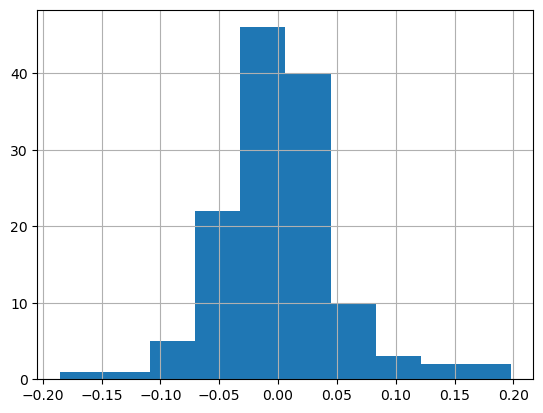

In [32]:
sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_max_only(x)).hist()

In [101]:
def get_month_excess_ret_quantile(month_data, qt=0.8):
    # Change the logic here for other ideas
    long_threshold_supliers = np.quantile(month_data['supplier_cnt'], q=qt)
    short_threshold_supliers = np.quantile(month_data['supplier_cnt'], q=(1-qt))
    long_threshold_data = month_data[(month_data['supplier_cnt'] >= long_threshold_supliers)]
    short_threshold_data = month_data[(month_data['supplier_cnt'] <= short_threshold_supliers)]
    return long_threshold_data['month_excess_ret'].mean()
    #return long_threshold_data['month_excess_ret'].mean() - short_threshold_data['month_excess_ret'].mean()
    #threshold_data = month_data[(month_data['supplier_cnt'] >= threshold_supliers) & (month_data['supplier_cnt'] <= max_threshold_supliers)]
    # month_data = month_data.dropna(subset=['supplier_cnt'],axis=0)
    # threshold_data = month_data[(month_data['supplier_cnt'] >= threshold_supliers) & (month_data['supplier_cnt'] <= max_threshold_supliers) & (month_data['supplier_cnt'] >= max_threshold_supliers)]
    #return threshold_data['month_excess_ret'].mean()

In [102]:
sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x)).sum()

0.2123814138105522

In [103]:
ser = sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x))

In [104]:
ser.mean()*np.sqrt(12)/ser.std()

0.3769650741249555

<AxesSubplot:xlabel='date'>

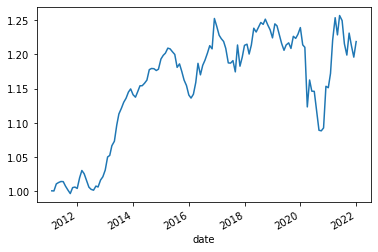

In [105]:
(sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x))+1).cumprod().plot()

In [110]:
plot_data = (sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x)))

In [111]:
plot_data

date
2011-01-31    0.000991
2011-02-28   -0.000191
2011-03-31    0.010242
2011-04-29    0.001990
2011-05-31    0.001513
                ...   
2021-08-31   -0.013527
2021-09-30    0.026730
2021-10-29   -0.014440
2021-11-30   -0.014251
2021-12-31    0.018964
Length: 132, dtype: float64

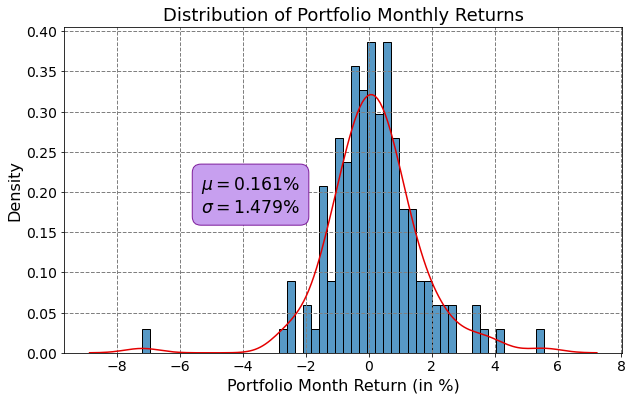

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(100*plot_data, bins=50, stat='density', ax=ax)
sns.kdeplot(100*plot_data, color='xkcd:red')
#ax.axvline(x=VaR99, ymin=0, ymax=0.95, color='xkcd:red', ls='-.', lw=3)
#ax.text(x=0.25, y=0.5, s='99% VaR', color='black', fontsize='xx-large', transform=ax.transAxes)
ax.text(x=0.245, y=0.43, s=f'$\mu = {plot_data.mean()*100:.3f}$%\n$ \sigma = {plot_data.std()*100:.3f}$%', color='black', fontsize='xx-large', transform=ax.transAxes, bbox=dict(facecolor='xkcd:lavender', edgecolor='xkcd:purple', boxstyle='round,pad=0.5'))
ax.grid(lw=1, ls='--', color='gray')
ax.set_xlabel('Portfolio Month Return (in %)', size=16)
ax.set_ylabel('Density', size=16)
ax.set_title('Distribution of Portfolio Monthly Returns', size=18)
ax.tick_params(axis='both', which='major', labelsize=14)

Text(0.5, 1.0, 'Portfolio Cummulative Returns over time')

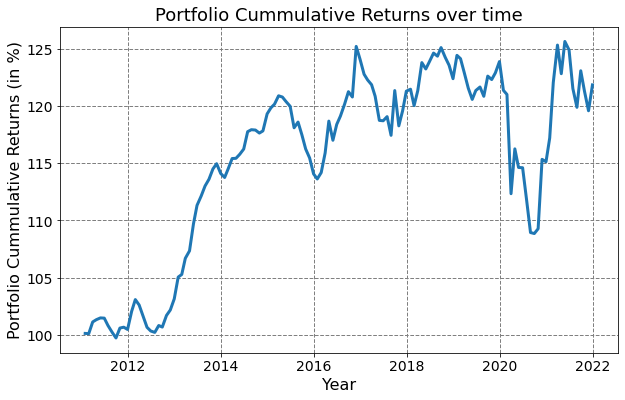

In [131]:
cumdata = (plot_data + 1).cumprod()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(cumdata*100, lw=3)
ax.grid(lw=1, ls='--', color='gray')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel('Portfolio Cummulative Returns (in %)', size=16)
ax.set_xlabel('Year', size=16)
ax.set_title('Portfolio Cummulative Returns over time', size=18)

<AxesSubplot:>

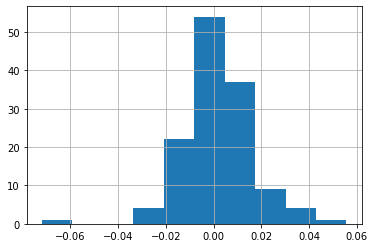

In [106]:
sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x)).hist()

In [63]:
sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x)).mean()/(sp_universe.groupby('date').apply(lambda x: get_month_excess_ret_quantile(x)).std())

0.0976774366295397